In [27]:
! pip install fastai

In [28]:
from fastai.vision.all import *

In [29]:
# We’ll use the Oxford-IIIT Pet dataset

path = untar_data(URLs.PETS)
print(path)

/root/.fastai/data/oxford-iiit-pet


In [30]:
path.ls()

(#2) [Path('/root/.fastai/data/oxford-iiit-pet/images'),Path('/root/.fastai/data/oxford-iiit-pet/annotations')]

In [31]:
path_annotations = path/'annotations'
path_images = path/'images'

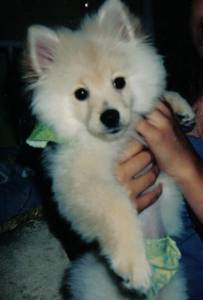

In [32]:
# Show one example image
from IPython.display import Image, display
display(Image('/root/.fastai/data/oxford-iiit-pet/images/pomeranian_180.jpg'))

In [33]:
path_annotations.ls()

(#7) [Path('/root/.fastai/data/oxford-iiit-pet/annotations/trimaps'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/xmls'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/list.txt'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/._trimaps'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/test.txt'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/README'),Path('/root/.fastai/data/oxford-iiit-pet/annotations/trainval.txt')]

In [34]:
# Defining a data block to handle data loading

pets = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct=0.2,seed=42),
    get_y=using_attr(RegexLabeller(r'(.+)_\d+.jpg$'),'name'),
    item_tfms=Resize(460),
    batch_tfms = aug_transforms(size=224, min_scale=0.75,max_rotate=10.0, max_zoom=1.1)
)
print(pets)

In [35]:
dls = pets.dataloaders(path_images)
print(dls)

In [36]:
# Create and train a CNN model
learn = vision_learner(dls, resnet50, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:00<00:00, 110MB/s]


epoch,train_loss,valid_loss,error_rate,time
0,1.378239,0.395390,0.117050,01:15


epoch,train_loss,valid_loss,error_rate,time
0,0.462218,0.259565,0.079161,01:21
1,0.345981,0.240610,0.066982,01:22
2,0.197847,0.201324,0.051421,01:21
3,0.127806,0.192205,0.050744,01:21


In [37]:
# Perform inference
img = PILImage.create('/content/drive/MyDrive/Colab Notebooks/GenAI/Assignments/great_pyranese.jpg')

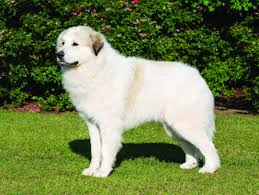

In [38]:
img

In [39]:
pred, pred_idx, probs = learn.predict(img)
print(f'Predicted breed: {pred}, Probability: {probs[pred_idx]:.4f}')

Predicted breed: great_pyrenees, Probability: 0.9978
